## Converting the image into CIE L*a*b* color space


In [ ]:
import cv2
import numpy as np

# Load the image
image = cv2.imread('/content/Screenshotfrom20200703024321.png')

# Convert the image to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

## K-means

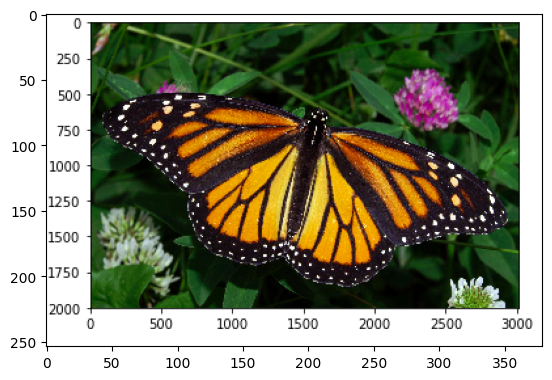

In [ ]:

import matplotlib.pyplot as plt


%matplotlib inline

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)


In [ ]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


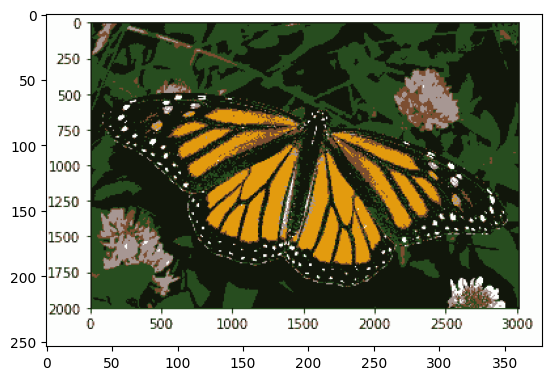

In [ ]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 6
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))

plt.imshow(segmented_image)


## Morphological Image Processing

In [ ]:
from skimage import io, morphology, filters
import matplotlib.pyplot as plt

# Load image
image = io.imread('/content/Screenshotfrom20200703024321.png')

# Convert to grayscale
image = filters.gaussian(image, sigma=2, multichannel=True) # Apply Gaussian smoothing to reduce noise
gray = io.imread('/content/Screenshotfrom20200703024321.png', as_gray=True)

# Apply erosion and dilation operations
selem = morphology.disk(5) # Create a disk-shaped structuring element with radius 5
eroded = morphology.erosion(gray, selem) # Apply erosion operation to grayscale image
dilated = morphology.dilation(gray, selem) # Apply dilation operation to grayscale image

# Apply opening and closing operations
opened = morphology.opening(gray, selem) # Apply opening operation to grayscale image
closed = morphology.closing(gray, selem) # Apply closing operation to grayscale image

# Display images
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
ax = axes.ravel()
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(eroded, cmap='gray')
ax[1].set_title('Erosion')
ax[2].imshow(dilated, cmap='gray')
ax[2].set_title('Dilation')
ax[3].imshow(opened, cmap='gray')
ax[3].set_title('Opening')
ax[4].imshow(closed, cmap='gray')
ax[4].set_title('Closing')
for a in ax:
    a.axis('off')
plt.tight_layout()
plt.show()

## Locally adaptive Thresholding using Otsu's method

In [ ]:
from skimage import io, filters
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = io.imread('/content/Screenshotfrom20200703024321.png', as_gray=True)

# Apply Gaussian smoothing
image = filters.gaussian(image, sigma=2)

# Define the size of the local neighborhood for thresholding
radius = 50

# Define a function to apply Otsu's method to each local neighborhood
def local_otsu(image, radius):
    thresholded = np.zeros_like(image)
    for i in range(len(image)):
        for j in range(len(image[0])):
            # Define the boundaries of the local neighborhood
            top = max(0, i - radius)
            bottom = min(len(image), i + radius + 1)
            left = max(0, j - radius)
            right = min(len(image[0]), j + radius + 1)
            # Apply Otsu's method to the local neighborhood
            threshold = filters.threshold_otsu(image[top:bottom, left:right])
            # Binarize the local neighborhood using the threshold value
            thresholded[i][j] = image[i][j] > threshold
    return thresholded

# Apply Otsu's method to each local neighborhood
thresholded = local_otsu(image, radius)

# Display images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(thresholded, cmap='gray')
ax[1].set_title('Locally Adaptive Thresholding (Otsu)')
plt.tight_layout()
plt.show()